<a href="https://colab.research.google.com/github/kshitijkatore/Machine_Learning/blob/main/stock_trend_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 3.2 MB/s 
     |████████████████████████████████| 110 kB 10.1 MB/s 
     |████████████████████████████████| 4.0 MB 47.6 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
     |████████████████████████████████| 112 kB 25.5 MB/s 
     |████████████████████████████████| 128 kB 53.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf


In [ ]:
start = '2010-01-01'
end = '2019-12-31'
hist = yf.Ticker('AAPL')
df = hist.history(period="20y", auto_adjust="True")
df.head()
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-12-23 00:00:00-05:00,0.215540,0.221476,0.214931,0.220563,125826400,0.0,0.0
2002-12-24 00:00:00-05:00,0.219802,0.220259,0.217671,0.218585,39340000,0.0,0.0
2002-12-26 00:00:00-05:00,0.219498,0.225434,0.217367,0.219193,85422400,0.0,0.0
2002-12-27 00:00:00-05:00,0.217823,0.218889,0.213257,0.214017,80035200,0.0,0.0
2002-12-30 00:00:00-05:00,0.214323,0.215388,0.210669,0.214170,155041600,0.0,0.0
...,...,...,...,...,...,...,...
2022-12-16 00:00:00-05:00,136.690002,137.649994,133.729996,134.509995,160080100,0.0,0.0
2022-12-19 00:00:00-05:00,135.110001,135.199997,131.320007,132.369995,79592600,0.0,0.0
2022-12-20 00:00:00-05:00,131.389999,133.250000,129.889999,132.300003,77432800,0.0,0.0


In [ ]:
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-12-16 00:00:00-05:00,136.690002,137.649994,133.729996,134.509995,160080100,0.0,0.0
2022-12-19 00:00:00-05:00,135.110001,135.199997,131.320007,132.369995,79592600,0.0,0.0
2022-12-20 00:00:00-05:00,131.389999,133.250000,129.889999,132.300003,77432800,0.0,0.0
2022-12-21 00:00:00-05:00,132.979996,136.809998,132.750000,135.449997,85859600,0.0,0.0
2022-12-22 00:00:00-05:00,134.352005,134.550003,130.300003,130.839996,45025732,0.0,0.0


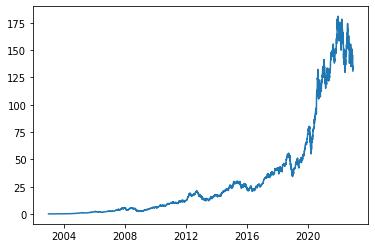

In [ ]:
plt.plot(df.Close)

In [ ]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-12-23 00:00:00-05:00,0.215540,0.221476,0.214931,0.220563,125826400,0.0,0.0
2002-12-24 00:00:00-05:00,0.219802,0.220259,0.217671,0.218585,39340000,0.0,0.0
2002-12-26 00:00:00-05:00,0.219498,0.225434,0.217367,0.219193,85422400,0.0,0.0
2002-12-27 00:00:00-05:00,0.217823,0.218889,0.213257,0.214017,80035200,0.0,0.0
2002-12-30 00:00:00-05:00,0.214323,0.215388,0.210669,0.214170,155041600,0.0,0.0
...,...,...,...,...,...,...,...
2022-12-16 00:00:00-05:00,136.690002,137.649994,133.729996,134.509995,160080100,0.0,0.0
2022-12-19 00:00:00-05:00,135.110001,135.199997,131.320007,132.369995,79592600,0.0,0.0
2022-12-20 00:00:00-05:00,131.389999,133.250000,129.889999,132.300003,77432800,0.0,0.0


In [ ]:
ma100 = df.Close.rolling(100).mean()
ma100

Date
2002-12-23 00:00:00-05:00           NaN
2002-12-24 00:00:00-05:00           NaN
2002-12-26 00:00:00-05:00           NaN
2002-12-27 00:00:00-05:00           NaN
2002-12-30 00:00:00-05:00           NaN
                                ...    
2022-12-16 00:00:00-05:00    151.755414
2022-12-19 00:00:00-05:00    151.510399
2022-12-20 00:00:00-05:00    151.213241
2022-12-21 00:00:00-05:00    150.957552
2022-12-22 00:00:00-05:00    150.670718
Name: Close, Length: 5036, dtype: float64

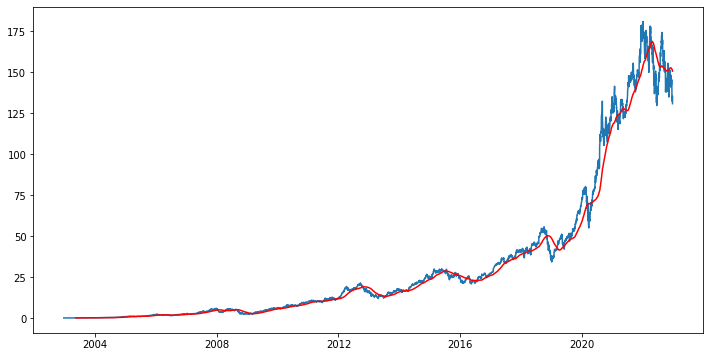

In [ ]:
plt.figure(figsize = (12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [ ]:
ma200 = df.Close.rolling(200).mean()
ma200

Date
2002-12-23 00:00:00-05:00           NaN
2002-12-24 00:00:00-05:00           NaN
2002-12-26 00:00:00-05:00           NaN
2002-12-27 00:00:00-05:00           NaN
2002-12-30 00:00:00-05:00           NaN
                                ...    
2022-12-16 00:00:00-05:00    152.435416
2022-12-19 00:00:00-05:00    152.285090
2022-12-20 00:00:00-05:00    152.153677
2022-12-21 00:00:00-05:00    152.047273
2022-12-22 00:00:00-05:00    151.890392
Name: Close, Length: 5036, dtype: float64

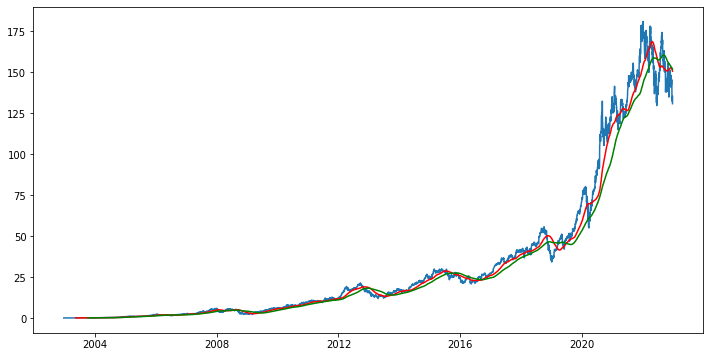

In [ ]:
plt.figure(figsize = (12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [ ]:
df.shape


(5036, 7)

In [ ]:

# Spliting data into trainnig and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70) :int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(3525, 1)
(1511, 1)


In [ ]:
data_training.head()
data_testing.head()

,Close
Date,
2016-12-22 00:00:00-05:00,27.207508
2016-12-23 00:00:00-05:00,27.261318
2016-12-27 00:00:00-05:00,27.434456
2016-12-28 00:00:00-05:00,27.317469
2016-12-29 00:00:00-05:00,27.310453


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[6.98160664e-04],
       [6.31920202e-04],
       [6.52299350e-04],
       ...,
       [9.06938601e-01],
       [9.09366610e-01],
       [9.10228223e-01]])

In [ ]:
data_training_array.shape

(3525, 1)

In [ ]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
  x_train.append(data_training_array[i-100 :i])
  y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
# Machine learning model

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences= True,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences= True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences= True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_4 (LSTM)               (None, 120)              

In [ ]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs= 50)

Epoch 1/50
108/108 [==============================] - 42s 331ms/step - loss: 0.0283
Epoch 2/50
108/108 [==============================] - 35s 324ms/step - loss: 0.0076
Epoch 3/50
108/108 [==============================] - 36s 337ms/step - loss: 0.0058
Epoch 4/50
108/108 [==============================] - 34s 312ms/step - loss: 0.0069
Epoch 5/50
108/108 [==============================] - 34s 312ms/step - loss: 0.0049
Epoch 6/50
108/108 [==============================] - 34s 319ms/step - loss: 0.0042
Epoch 7/50
108/108 [==============================] - 33s 308ms/step - loss: 0.0044
Epoch 8/50
108/108 [==============================] - 35s 323ms/step - loss: 0.0041
Epoch 9/50
108/108 [==============================] - 34s 318ms/step - loss: 0.0036
Epoch 10/50
108/108 [==============================] - 34s 314ms/step - loss: 0.0035
Epoch 11/50
108/108 [==============================] - 34s 312ms/step - loss: 0.0033
Epoch 12/50
108/108 [==============================] - 33s 308ms/step - lo

In [ ]:
model.save('keras_model.h5')

In [ ]:
data_training.tail(100)

,Close
Date,
2016-08-02 00:00:00-04:00,24.188517
2016-08-03 00:00:00-04:00,24.491796
2016-08-04 00:00:00-04:00,24.643099
2016-08-05 00:00:00-04:00,25.017855
2016-08-08 00:00:00-04:00,25.225012
...,...
2016-12-15 00:00:00-05:00,27.097548
2016-12-16 00:00:00-05:00,27.132639
2016-12-19 00:00:00-05:00,27.289400


In [ ]:
past_100_days = data_training.tail(100)

In [ ]:
final_df = past_100_days.append(data_testing, ignore_index=True)

In [ ]:
final_df.head()

,Close
0,24.188517
1,24.491796
2,24.643099
3,25.017855
4,25.225012


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.00116726],
       [0.00309954],
       [0.00406353],
       ...,
       [0.68997542],
       [0.7100449 ],
       [0.68067331]])

In [ ]:
input_data.shape

(1611, 1)

In [ ]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100 :i])
  y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)


(1511, 100, 1)
(1511,)


In [ ]:
# making prediction

y_predicted = model.predict(x_test)
y_predicted.shape

48/48 [==============================] - 5s 90ms/step


(1511, 1)

In [ ]:
y_test

array([0.02040209, 0.02074493, 0.02184804, ..., 0.68997542, 0.7100449 ,
       0.68067331])

In [ ]:
y_predicted

array([[0.05230945],
       [0.05250624],
       [0.05271992],
       ...,
       [0.75165284],
       [0.7432963 ],
       [0.7336484 ]], dtype=float32)

In [ ]:
scaler.scale_

array([0.00637128])

In [ ]:
scale_factor = 1/0.00637128
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

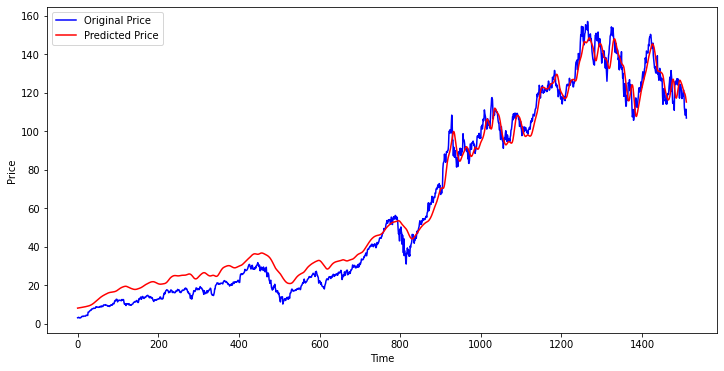

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()